# Create a NLP for seismology papers

## Part 1 - Extract text from PDFs

In [121]:
import textract
import os
import numpy as np
import glob

In [122]:
def scrape_all_paper(input_pdf, output_directory):
    """
    This function takes an input PDF and scrapes the ENTIRETY of it into a text file. 
    
    @param input_pdf : [string] Input PDF path
    @param output_directory : [string] Output directory
    """
    pdf_bn = os.path.basename(input_pdf)[0:-4]
    
    # If the pdf title of the basename includes spaces, change it to underscores
    pdf_bn.replace(" ", "_")
    
    # If there is already an output file, skip it 
    if len(glob.glob(f'{output_directory}{pdf_bn}*.txt')) > 0:
        print(f'{pdf_bn} already scraped!')
        return
    try:
        text = str(textract.process(input_pdf, encoding='ascii'))

        out = f'{output_directory}{pdf_bn}_{paragraph_ind}.txt'
        fname = open(out, "w")
        fname.write(text)
        fname.close()
        print(f'Scraped file {pdf_bn}')
    except:
        return
    
    return

In [123]:
# def scrape_pdf(input_pdf, output_directory):
#     """
#     This function takes an input PDF and scrapes each paragraph into separate text files. 
    
#     @param input_pdf : [string] Input PDF path
#     @param output_directory : [string] Output directory
#     """
#     pdf_bn = os.path.basename(input_pdf)[0:-4]
    
#     # If the pdf title of the basename includes spaces, change it to underscores
#     pdf_bn.replace(" ", "_")
    
#     # If there is already an output file, skip it 
#     if len(glob.glob(f'{output_directory}{pdf_bn}*.txt')) > 0:
#         print(f'{pdf_bn} already scraped!')
#         return
#     try:
#         text = str(textract.process(input_pdf, encoding='ascii'))

#         newline_split = text.split('.\\n')
#         for paragraph_ind in np.arange(len(newline_split)):

#             # If there are less than 400 characters in the paragraph, skip it
#             if len(newline_split[paragraph_ind]) < 400:
#                 continue

#             out = f'{output_directory}{pdf_bn}_{paragraph_ind}.txt'
#             fname = open(out,"w")
#             fname.write(newline_split[paragraph_ind])
#             fname.close()
#         print(f'Scraped file {pdf_bn}')
#     except:
#         return
    
#     return
# # testpaper = '/home/francesco/Dropbox/papers/ANT_velchanges/taira_2018_velchanges_improvements.pdf'
# # outdir = '/home/francesco/data/nlp_seismo/'
# # scrape_pdf(testpaper, outdir)

In [124]:
# Scrape each PDF in my seismology paper directory
outdir = '/media/francesco/easystore/nlp_seismo/'
pdf_folder = '/home/francesco/Dropbox/papers/'
pdf_list = !find {pdf_folder} -name "*.pdf"

for pdf_file in pdf_list:
#     scrape_pdf(pdf_file, outdir)
    scrape_all_paper(pdf_file, outdir)

Scraped file jgre20774-sup-0001-supplementary
Scraped file taira_2018_velchanges_improvements_supplementary
Scraped file Minato_2012_tohoku_velchange
taira_2018_velchanges_improvements already scraped!
Scraped file Domingues_2016_east_african_rift_mozambique
Scraped file Wathelet_2004_neighborhood_algorithm
Scraped file Mordret_2014_valhall_inv
Scraped file Kim_2012_Ethiopian_Rift
Scraped file 2019_Pohang_eq_report
Scraped file Li_2018_ML_phase_determination_EEW
Scraped file Meier_2019_phase_noise_determination
Scraped file Park_2008_crustalstructure_rayleigh_wave_tomography
Scraped file Mokhtar_2001_crustalstructure_from_surface_waves
Scraped file Downs_2018_harrat_rahat_geo
Scraped file Stern_2010_Saudi_arabia_structure
Scraped file Blank_1983_400m_volcanics
Scraped file Baltay, Hanks, Abrahamson - 2017 - Uncertainty, Variability, and Earthquake Physics in Ground‐Motion Prediction Equations
Scraped file Tang_2018
Scraped file Abdelwahed_2016_supplementary_materials
Scraped file Chang

## Part 2 - Create a language model

In [125]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [126]:
from fastai.text import *

In [127]:
# Check whether it's using CPU or GPU
from fastai.basics import *
defaults.device

device(type='cuda')

In [128]:
# Save a language model for the papers
bs = 16
datapath = '/media/francesco/easystore/nlp_seismo/'
runpath = '/home/francesco/Dropbox/dl_projects/nlp_seismo/'
data_lm = (TextList.from_folder(datapath)
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
# data_lm = (TextList.from_folder(datapath)
#            #Inputs: all the text files in path
#             .filter_by_folder(include=['train', 'test', 'unsup']) 
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
data_lm.save(f'{runpath}data_lm.pkl')

In [129]:
# Load the language model
data_lm = load_data(runpath, 'data_lm.pkl', bs=bs)

In [130]:
# Check that the language model compiled correctly
data_lm

TextLMDataBunch;

Train: LabelList (93 items)
x: LMTextList
xxbos xxunk xxmaj seismology and xxmaj geophysics 
  xxmaj philippe xxmaj lognonn 
  xxmaj institut de xxmaj physique du xxmaj globe de xxmaj paris 
  xxmaj universit xxmaj paris xxmaj diderot 
  xxmaj france 
 
  201279 
 
  \ xxunk outline 
  xxmaj what can we get from geophysical exploration and 
  sounding of a planet other than xxmaj earth ? 
  a complete illustration with the xxmaj moon 
 
  xxmaj what can we imagine from geophysical exploration 
  and sounding of a planet other than xxmaj earth ? 
  xxmaj xxunk for xxmaj mars , the xxmaj moon and xxmaj venus ... 
 
  201279 
 
  \ xxunk situ geophysical exploration 
  xxmaj goal of in situ geophysical exploration is to determine the xxmaj internal structure of a 
  planet 
  xxmaj internal structure is 
  xxmaj xxunk state ( pressure and temperature ) 
  xxmaj mineralogy 
 
  xxmaj the approach is based 
  xxmaj on geophysical methods determining the profile with depth 

In [131]:
# Show a patch from the language model
data_lm.show_batch()

idx,text
0,"what can we imagine from geophysical exploration \n and sounding of a planet other than xxmaj earth ? \n xxmaj xxunk for xxmaj mars , the xxmaj moon and xxmaj venus ... \n \n 201279 \n \n \ xxunk situ geophysical exploration \n xxmaj goal of in situ geophysical exploration is to determine the xxmaj internal structure of a \n planet \n xxmaj"
1,"mw 5.5 in xxmaj south xxmaj korea . xxmaj science , 360 , 1003 - 1006 . \n xxmaj hardebeck , xxup j.l. and xxmaj shearer , xxup p.m. , 2002 , a new method for determining first - motion focal mechanisms . \n xxmaj bulletin of the xxmaj seismological xxmaj society of xxmaj america , 92 , xxunk - xxunk . \n xxmaj kato , xxup"
2,\n \n 20 \n \n 20.0 \n \n _ \n \n \ \ \n \n i \n \n xxunk \n \n 30.0 \n \n xxup dx : xxunk \n xxup dh : 310 m \n xxup nx : 656 points \n \n 15 \n \n xxunk \n \n xxup distance ( xxup km ) \n 3800
3,"which can be very large , as discussed in the text . \n b \n xxmaj depth is left blank if assumed to be 933 109 km except for xxup xxunk and xxup xxunk , for which a depth of 750 109 km was assumed . \n \n 5 of 12 \n \n \ x0cnakamura : xxup moonquakes xxup and xxup interior xxup of xxup the"
4,sulfur concentration at the eutectic melting temperature \n decreases with increasing pressure and appears to asymptotically \n reach a xed value of about 0.12 at high pressure ( see xxmaj fig . 2b ) . \n xxmaj the experimental data can be adequately described by an exponentially decreasing function with pressure : \n \n xe p xxunk c1 e \ xxunk p ; \n \n


In [132]:
# Create a learner using the wikipedia base
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [133]:
# Find the learning rate for the model
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


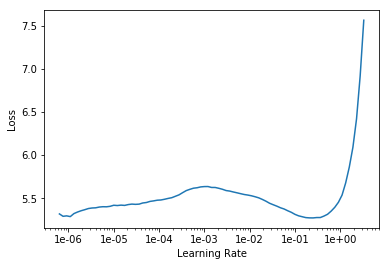

In [134]:
# Plot the learning rate
learn.recorder.plot()
# learn.recorder.plot(skip_end=15)

In [135]:
# Fit one cycle
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.021752,3.602743,0.346167,05:40


In [136]:
learn.save('fit_head')

In [137]:
# Test the LM
TEXT = "The seismic waves were observed"
N_WORDS = 40
N_SENTENCES = 2

In [138]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

The seismic waves were observed in the Moho and in the Martinez Observatory and University of California , Berkeley ( 
  The August 13 , 2002 ) , which at the 
  12.5 Center (
The seismic waves were observed as the noise 
  rapidly phases in the seismograms in the image , except that the faulted - filled noise 
  is observed on the surface . Investigations of the data were performed by Meyer , H.
